# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')


In [2]:
# function created from previous lab ("Testing Trends")
def dt_convert(data, col, idx=True, drop=True):
    
    data[col] = pd.to_datetime(data[col])
    
    if idx == True and drop == True:
        data.set_index(col, inplace=True, drop=True)
            
    else:
        data.set_index(col, inplace=True, drop=False)
        #display(data.info(), set_caption=('{%s}', data))
    return data.info()

dt_convert(df, 'Month')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [3]:
str(df.index.dtype)

'datetime64[ns]'

In [86]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def time_stats(data, idx, col):
    import pandas as pd
    from pandas import Series
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    import statsmodels.api as sm
    
    # convert date column to datetime and set as index
    def dt_convert(data, col, idx=True, drop=True):
        data[col] = pd.to_datetime(data[col])
        if idx == True and drop == True:
            data.set_index(col, inplace=True, drop=True)
        else:
            data.set_index(col, inplace=True, drop=False)
        return None
    
    # plot rolling mean and std
    def roll_stats(TS, win=12, center=False):
        #Determine rolling statistics
        rolmean = TS.rolling(window=12, center=False).mean()
        rolstd = TS.rolling(window=12, center=False).std()
        #Plot rolling statistics
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='green', label='original')
        mean = plt.plot(rolmean, color='black', label='rolling mean')
        std = plt.plot(rolstd, color='grey', label='rolling std')
        plt.legend(loc='best')
        plt.title('Rolling mean and standard deviation')
        return plt.show()
    
    # adfuller test
    def dickey_fuller(TS, col):
        from statsmodels.tsa.stattools import adfuller
        #Perform Dickey-Fuller test:
        print('Dickey Fuller Test Results:')
        dtest = adfuller(TS[col])
        # Extract and display test results in a user friendly manner
        dout = pd.Series(dtest[0:4], index=['Test Statistic','p-value',
                                            '#Lags Used','Number of Observations Used'])
        for key, value in dtest[4].items():
            dout['Critical Value (%s)'%key] = value
        if dtest[0] < dtest[1]:
            print("Null hypothesis cannot be rejected.\nThe data is not stationary!")
        else:
            print("Null hypothesis is rejected.\nThe data is stationary!")
        return display(dout)
    
    ### Run the above functions 
    # Check if dataframe is already datetimeindex, rename to TS
    if str(df.index.dtype) != 'datetime64[ns]':
        TS = dt_convert(data, idx)
    else:
        TS = data
    
    info = display(TS.info())
    rs = roll_stats(TS)    
    adf = dickey_fuller(TS, col)
    ### Return output
    print(info)
    print(rs)
    print(adf)
    return TS

Use your newly created function on the airpassenger data set.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


None

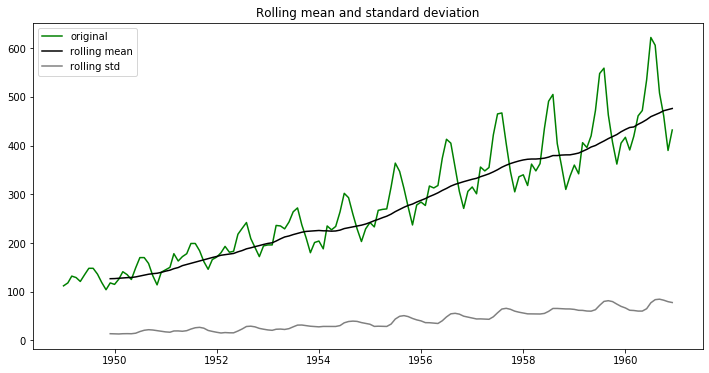

Dickey Fuller Test Results:
Null hypothesis cannot be rejected.
The data is not stationary!


Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

None
None
None


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [87]:
ts_stats = time_stats(df, 'Month', '#Passengers')
ts_stats

## Perform a log() and sqrt() transform

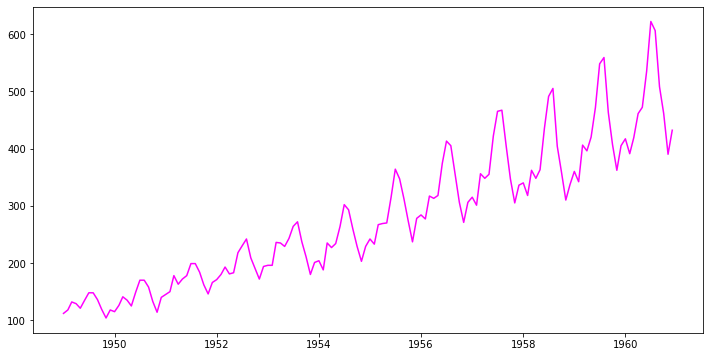

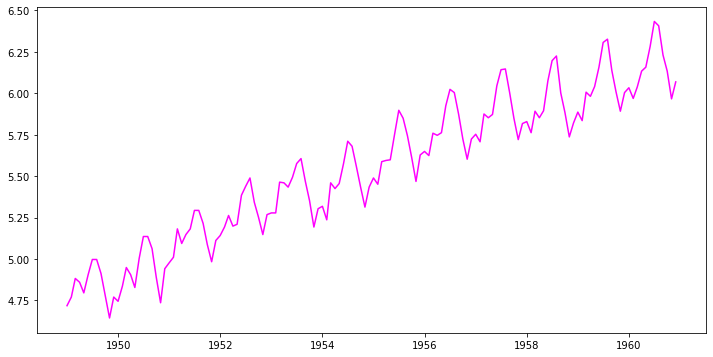

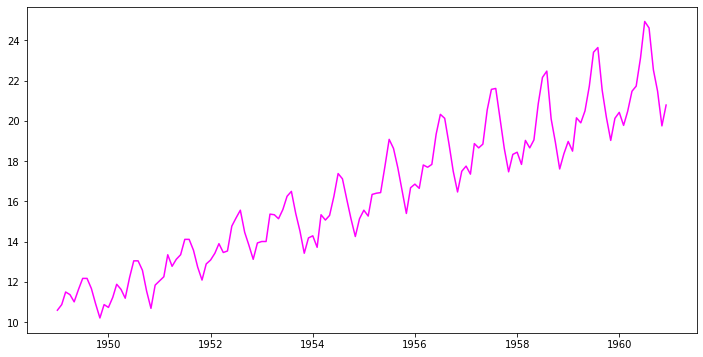

In [92]:
ts_log = np.log(ts)
ts_sqrt= np.sqrt(ts)

fig = plt.figure(figsize=(12,6))
plt.plot(ts,  color='magenta');
plt.show()

fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='magenta');
plt.show()

fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='magenta');

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

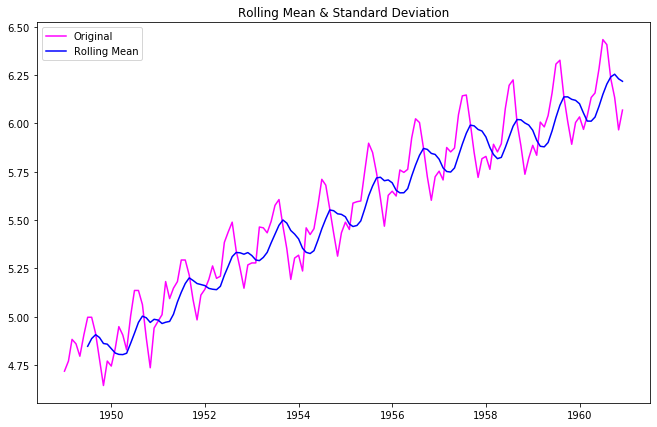

In [94]:
rolmean = np.log(ts).rolling(window = 7).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(np.log(ts), color='magenta',label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [95]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolmean = np.log(ts) - rolmean
data_minus_rolmean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [96]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

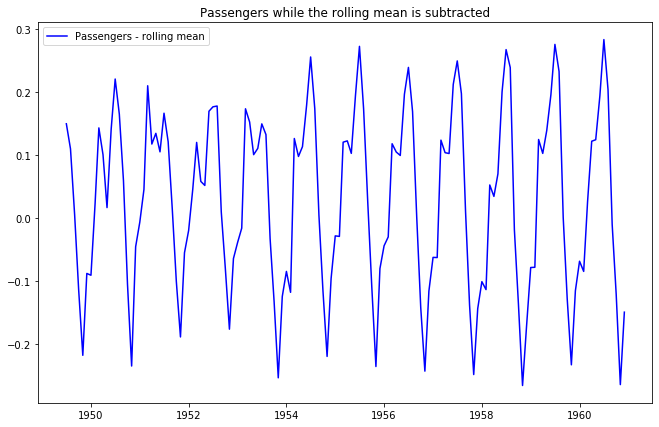

In [97]:
# Plot the result
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Passengers - rolling mean')
plt.legend(loc='best')
plt.title('Passengers while the rolling mean is subtracted')
plt.show(block=False)

Finally, use your function `check_stationarity` to see if this series is considered stationary!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1949-07-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    138 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


None

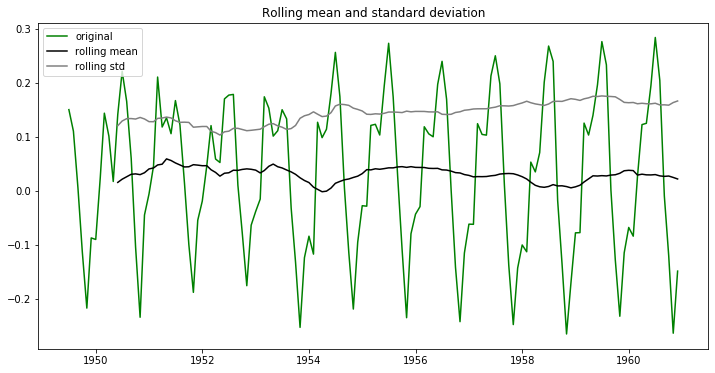

Dickey Fuller Test Results:
Null hypothesis cannot be rejected.
The data is not stationary!


Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64

None
None
None


,#Passengers
Month,
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404
1949-10-01,-0.113317
1949-11-01,-0.217275
...,...
1960-08-01,0.204160
1960-09-01,-0.009635
1960-10-01,-0.120365


In [99]:
time_stats(data_minus_rolmean, idx='Month', col='#Passengers')

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


    The time series is not stationary (p-value is 0.15 compared to test stat which is -2.34).

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

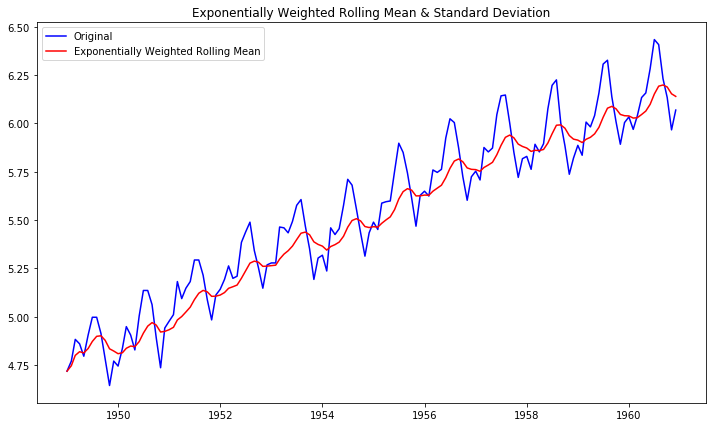

In [100]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = np.log(ts).ewm(halflife = 4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(np.log(ts), color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

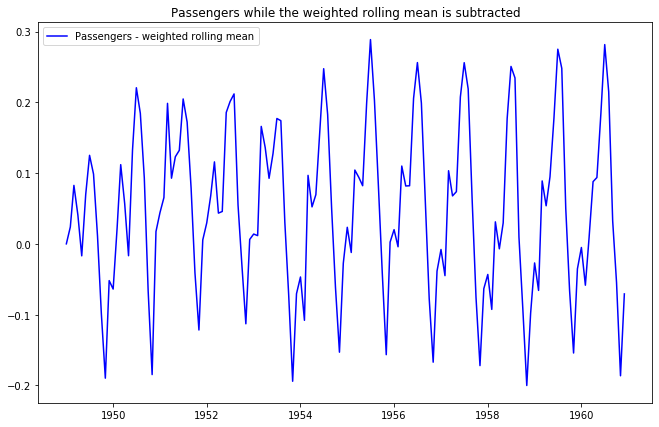

In [101]:
# Subtract the moving average from the original data and plot
data_minus_exp_rolmean = np.log(ts) - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Passengers - weighted rolling mean')
plt.legend(loc='best')
plt.title('Passengers while the weighted rolling mean is subtracted')
plt.show(block=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


None

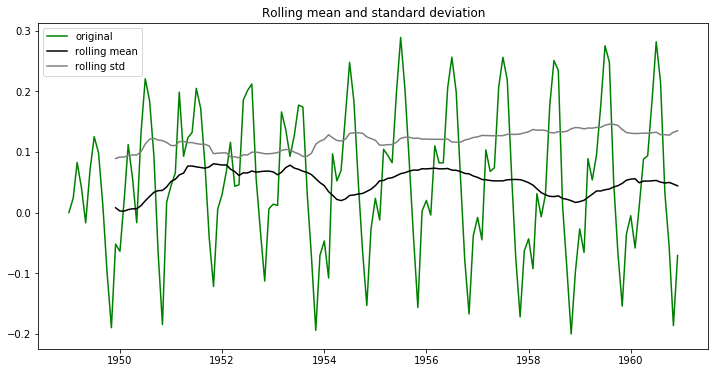

Dickey Fuller Test Results:
Null hypothesis cannot be rejected.
The data is not stationary!


Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

None
None
None


,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.023838
1949-03-01,0.082598
1949-04-01,0.040640
1949-05-01,-0.016963
...,...
1960-08-01,0.214859
1960-09-01,0.032342
1960-10-01,-0.054441


In [103]:
# do a stationarity check
time_stats(data_minus_exp_rolmean, idx='Month', col='#Passengers')

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [104]:
# difference your data and look at the head
data_diff = data_minus_exp_rolmean.diff(periods=12)
data_diff.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


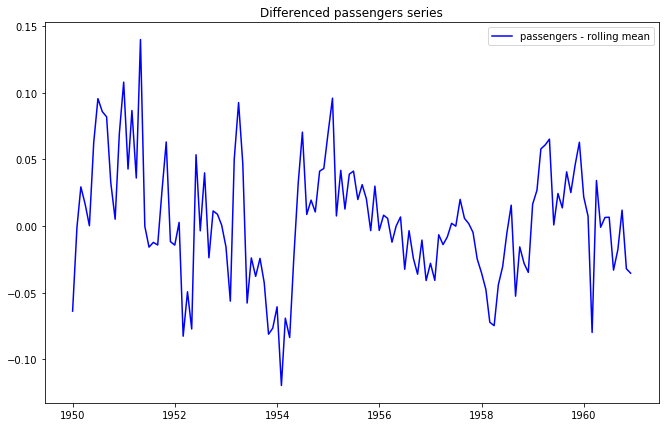

In [105]:
# plot your differenced time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='passengers - rolling mean')
plt.legend(loc='best')
plt.title('Differenced passengers series')
plt.show(block=False)

In [106]:
# drop nas
data_diff.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1950-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    132 non-null float64
dtypes: float64(1)
memory usage: 2.1 KB


None

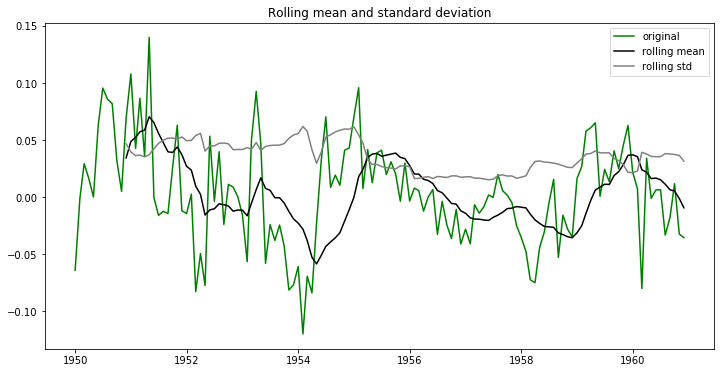

Dickey Fuller Test Results:
Null hypothesis cannot be rejected.
The data is not stationary!


Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

None
None
None


,#Passengers
Month,
1950-01-01,-0.063907
1950-02-01,-0.001185
1950-03-01,0.029307
1950-04-01,0.016168
1950-05-01,0.000194
...,...
1960-08-01,-0.033138
1960-09-01,-0.017754
1960-10-01,0.011836


In [107]:
# perform the stationarity check
time_stats(data_diff, idx='Month', col='#Passengers')

### Your conclusion

Rolling mean and rolling average fluctuate, seemingly at random. However, this is also true of the original TS.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.